# Multi-factor Strategies Coding Challenge - Spring 2025

In [ ]:
"""

Your Name: Yuvan Anthony

"""

The Multi-factor teams are dedicated to calculating predicted expected returns of securities and sectors. We research and implement multi-factor models with the goal of calculating the expected forward-looking returns.

**Rules:**


*   You are absolutely allowed to use LLMs, but you MUST cite any use with a comment on each line written by it.
*   Any code not written by you must be cited similarly.
*   No machine learning is allowed for this challenge.

**Hints:**


*   Read all of the instructions carefully!
*   Comment your code with as much detail as you can. The easier it is for us to follow, the better!
*   Above everything else, we are looking to see that you can think creatively, and justify your thought process.
*   Don't give up if you get stuck! It's better to submit something that's the best that you can do, instead of quitting and not submitting anything.


If you have any questions about this part of the challenge, email Jason Bhalla, the Head of Multifactor Security-Specific Strategies, at jbhalla@stevens.edu.

# Part 0: Data

In the following cell, import any libraries you need.

In [391]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In the following cell, write your code to load and preprocess the data given to you for the challenge. All data collection should be done here. (Note: You are allowed to import additional data if you wish.

In [392]:
data = pd.read_excel('/Users/yuvananthony/Downloads/SSMIF Coding Challenge S25/Multi-Factor Model Coding Challenge S25/multifactor_security_data.xlsx', sheet_name = None)

stock_price = data['Stock Price']
stock_price.columns = stock_price.iloc[2]
stock_price.columns = stock_price.columns.to_list()
stock_price.columns.values[0] = stock_price.iloc[4, 0]
stock_price = stock_price[6:].reset_index(drop = True)

aapl = stock_price['AAPL']
nvda = stock_price['NVDA']
jpm = stock_price['JPM']
gs = stock_price['GS']

market_price = data['Market (S&P 500) Price']
market_price.columns = market_price.columns.to_list()
market_price.columns.values[1] = market_price.iloc[2, 1]
market_price = market_price[6:].reset_index(drop = True)

treasury = data['10-Year Treasury']
treasury.columns = treasury.columns.to_list()
treasury.columns.values[1] = treasury.iloc[2 ,1]
treasury = treasury.iloc[6:].reset_index(drop = True)

In the following cell, write any comments about your code and reasoning, such as why you processed the data in a certain way, what you noticed, where you found any additional data (if you decide to do so), etc.

In [393]:
"""
I renamed the columns of the data, because it was mixed up and then reset the index,
to keep accessing values consistent.

"""

'\n\nComments here.\n\n'

# Part 1: Capital Asset Pricing Model (CAPM)

The Capital Asset Pricing Model (CAPM) is a popular model that describes the relationship between the expected return and the risk of investing in a security.

In the following cell, implement the Capital Asset Pricing Model on the data given to you for Part 1.

Your final result should be the expected forward-looking returns for the assets given in the data.

In [394]:
def capm(beta, rfr, exp_market_return):
    return rfr + beta * (exp_market_return - rfr)

risk_free_rate = treasury['USGG10YR Index'].iloc[-1]

In [437]:
aapl_df = pd.DataFrame({
    'AAPL Prices' : aapl,
    'Market Prices' : market_price['SPY US Equity']
})

aapl_df = aapl_df.astype(float)

aapl_returns = np.log(aapl_df / aapl_df.shift(1))
aapl_returns = aapl_returns.dropna()

cov = aapl_returns.cov() * 252

market_var = aapl_returns['Market Prices'].var() * 252

aapl_beta = cov.iloc[0, 1] / market_var #the 0th row, 1st column is the covariance(aapl, market)

exp_market_return = aapl_returns['Market Prices'].mean() * 252

aapl_capm = capm(aapl_beta, risk_free_rate, exp_market_return) / 100

print('Expected returns for AAPL:', aapl_capm)

Expected returns for AAPL: 0.04399249180964153


In [438]:
nvda_df = pd.DataFrame({
    'NVDA Prices' : nvda,
    'Market Prices' : market_price['SPY US Equity']
})

nvda_df = nvda_df.astype(float)

nvda_returns = np.log(nvda_df / nvda_df.shift(1))
nvda_returns = nvda_returns.dropna()

cov = nvda_returns.cov() * 252

nvda_beta = cov.iloc[0, 1] / market_var

nvda_capm = capm(nvda_beta, risk_free_rate, exp_market_return) / 100

print('Expected returns for NVDA:', nvda_capm)

Expected returns for NVDA: 0.045131055847657316


In [439]:
jpm_df = pd.DataFrame({
    'JPM Prices' : jpm,
    'Market Prices' : market_price['SPY US Equity']
})

jpm_df = jpm_df.astype(float)

jpm_returns = np.log(jpm_df / jpm_df.shift(1)).dropna()

cov = jpm_returns.cov() * 252

jpm_beta = cov.iloc[0, 1] / market_var

jpm_capm = capm(jpm_beta, risk_free_rate, exp_market_return) / 100

print('Expected returns for JPM:', jpm_capm)

Expected returns for JPM: 0.0438048577123392


In [440]:
gs_df = pd.DataFrame({
    'GS Prices' : gs,
    'Market Prices' : market_price['SPY US Equity']
})

gs_df = gs_df.astype(float)

gs_returns = np.log(gs_df / gs_df.shift(1)).dropna()

cov = gs_returns.cov() * 252

gs_beta = cov.iloc[0, 1] / market_var

gs_capm = capm(gs_beta, risk_free_rate, exp_market_return) / 100

print('Expected returns for GS:', gs_capm)

Expected returns for GS: 0.04553279399851011


In the following cell, write any comments about your code and reasoning, such as why you implemented the CAPM in a specific way, what you noticed, what the significance of this is, etc.

In [399]:
"""
The CAPM uses a comparison between the movement of the stock and the S&P500(the market) to
estimate returns for the stock. I used the covariance between the stock and market, and 
divided it by the variance of the market. The beta calculation was the main part, and after
that I just multiplied it by the expected market return and added it to the risk free rate.
"""

'\n\nComments here.\n\n'

# Part 2: Multi-factor Model

The objective of this is to create a multifactor model based on the provided data. The model can be an existing model that you research and implement, or you can use the data to create a new multifactor model of your choice. The only restriction is that your model must include a minimum of 3 factors.

Be creative!

Your model does not necessarily need to perform well. We are mainly looking to see your creativity and whether you can express your thought process.

You are free to pull any additional data, or you can stick with the financial data given to you for this part.

In the following cell, implement your three-factor model.

Your final result should be the expected forward-looking returns for the 4 stocks.

In [400]:
pe = data['PE Ratio']
pe.columns = pe.iloc[2]
pe.columns = pe.columns.to_list()
pe.columns.values[0] = 'Date'
pe = pe[6:].reset_index(drop = True)

In [401]:
#pe beta

aapl_pe = pe['AAPL'].astype(float)
nvda_pe = pe['NVDA'].astype(float)
jpm_pe = pe['JPM'].astype(float)
gs_pe = pe['GS'].astype(float)

aapl_pe_df = pd.DataFrame({
    'AAPL Prices' : aapl.astype(float),
    'PE Ratio' : aapl_pe
})

nvda_pe_df = pd.DataFrame({
    'NVDA Prices' : nvda.astype(float),
    'PE Ratio' : nvda_pe
})

jpm_pe_df = pd.DataFrame({
    'JPM Prices' : jpm.astype(float),
    'PE Ratio' : jpm_pe
})

gs_pe_df = pd.DataFrame({
    'GS Prices' : gs.astype(float),
    'PE Ratio' : gs_pe
})

aapl_pe_returns = np.log(aapl_pe_df / aapl_pe_df.shift(1)).dropna()
nvda_pe_returns = np.log(nvda_pe_df / nvda_pe_df.shift(1)).dropna()
jpm_pe_returns = np.log(jpm_pe_df / jpm_pe_df.shift(1)).dropna()
gs_pe_returns = np.log(gs_pe_df / gs_pe_df.shift(1)).dropna()

aapl_cov = aapl_pe_returns.cov() * 252
nvda_cov = nvda_pe_returns.cov() * 252
jpm_cov = jpm_pe_returns.cov() * 252
gs_cov = gs_pe_returns.cov() * 252

aapl_pe_var = aapl_pe_returns['PE Ratio'].var() * 252
nvda_pe_var = nvda_pe_returns['PE Ratio'].var() * 252
jpm_pe_var = jpm_pe_returns['PE Ratio'].var() * 252
gs_pe_var = gs_pe_returns['PE Ratio'].var() * 252

aapl_beta2 = aapl_cov.iloc[0, 1] / aapl_pe_var
nvda_beta2 = nvda_cov.iloc[0, 1] / nvda_pe_var
jpm_beta2 = jpm_cov.iloc[0, 1] / jpm_pe_var
gs_beta2 = gs_cov.iloc[0, 1] / gs_pe_var

def pe_eq(beta2, pe_returns):
    return beta2 * pe_returns

aapl_pe_est = pe_eq(aapl_beta2, (aapl_pe_returns['PE Ratio'].mean() * 252))
nvda_pe_est = pe_eq(nvda_beta2, (nvda_pe_returns['PE Ratio'].mean() * 252))
jpm_pe_est = pe_eq(jpm_beta2, (jpm_pe_returns['PE Ratio'].mean() * 252))
gs_pe_est = pe_eq(gs_beta2, (gs_pe_returns['PE Ratio'].mean() * 252))

In [402]:
#book value

book_value = data['Book Value per Share']
book_value.columns = book_value.iloc[2]
book_value.columns = book_value.columns.to_list()
book_value.columns.values[0] = 'Date'2
book_value = book_value[6:].dropna().reset_index(drop = True)

aapl_book = book_value['AAPL']
nvda_book = book_value['NVDA']
jpm_book = book_value['JPM']
gs_book = book_value['GS']

aapl_book_returns = ((aapl_book.iloc[-1] / aapl_book.iloc[0]) - 1) / 100
nvda_book_returns = ((nvda_book.iloc[-1] / nvda_book.iloc[0]) - 1) / 100
jpm_book_returns = ((jpm_book.iloc[-1] / jpm_book.iloc[0]) - 1) / 100
gs_book_returns = ((gs_book.iloc[-1] / gs_book.iloc[0]) - 1) / 100

aapl_beta3 = ((aapl_returns['AAPL Prices'].mean() * 252 + aapl_book_returns) / aapl_book_returns)
nvda_beta3 = ((nvda_returns['NVDA Prices'].mean() * 252 + nvda_book_returns) / nvda_book_returns)
jpm_beta3 = ((jpm_returns['JPM Prices'].mean() * 252 + jpm_book_returns) / jpm_book_returns)
gs_beta3 = ((gs_returns['GS Prices'].mean() * 252 + gs_book_returns) / gs_book_returns)


def book_eq(beta3, book_returns):
    return beta3 * book_returns

aapl_book_est = book_eq(aapl_beta3, aapl_book_returns)
nvda_book_est = book_eq(nvda_beta3, nvda_book_returns)
jpm_book_est = book_eq(jpm_beta3, jpm_book_returns)
gs_book_est = book_eq(gs_beta3, gs_book_returns)

In [403]:
#using capm (market value), pe ratio, book value

def three_factor(risk_free_rate, capm, pe, book):
    return capm + pe + book + risk_free_rate

In [415]:
aapl_3_factor = three_factor(risk_free_rate, aapl_capm, aapl_pe_est, aapl_book_est) / 100
nvda_3_factor = three_factor(risk_free_rate, nvda_capm, nvda_pe_est, nvda_book_est) / 100
jpm_3_factor = three_factor(risk_free_rate, jpm_capm, jpm_pe_est, jpm_book_est) / 100
gs_3_factor = three_factor(risk_free_rate, gs_capm, gs_pe_est, gs_book_est) / 100

In the following cell, write any comments about your code and reasoning, such as what your factors were, how you decided on them, what your thought process was, what worked and didn't work, etc. Justify your model as best as you can.

In [384]:
"""

Factor 1: Market prices
Factor 2: P/E Ratio
Factor 3: Book Value
Other Factors:

Comments here.
I used the CAPM for the first factor which was market prices to stock prices.
Next, I used the change in PE Ratio as my second factor. Finally, I used the
change in book value to compare to the price returns. I added the three factors,
including their betas together along with the risk free rate as my alpha. The
forecasted returns are for a year into the future.

"""

'\n\nFactor 1: Market prices\nFactor 2: P/E Ratio\nFactor 3: Book Value\nOther Factors:\n\nComments here.\nI used the CAPM for the first factor which was market prices to stock prices.\nNext, I used the change in PE Ratio as my second factor. Finally, I used the\nchange in book value to compare to the price returns. I added the three factors,\nincluding their betas together along with the risk free rate as my alpha.\n\n'

# Part 3: Backtesting

A very important part of the model-building process is backtesting. Backtesting is where you compare your model's performance against a benchmark to see how well it performs. In this section, you will backtest your expected forward-looking returns from your multifactor model against the actual forward-looking returns for each stock.

In the following cell, backtest your CAPM model against actual returns for the stocks. In addition to plotting the returns, provide the Sharpe Ratio, Cumulative Returns, and Volatility against the S&P 500.

Text(0.5, 1.0, 'AAPL Prices vs 3-Factor Projection')

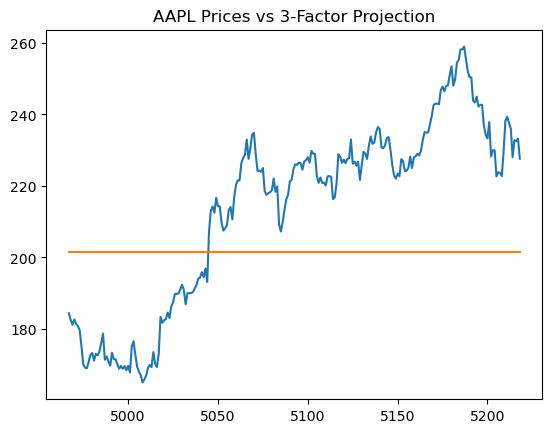

In [442]:
#three factor model

tf_df = pd.DataFrame({
    'AAPL Prices' : aapl_df['AAPL Prices'].iloc[-252:],
    'NVDA Prices' : nvda_df['NVDA Prices'].iloc[-252:],
    'JPM Prices' : jpm_df['JPM Prices'].iloc[-252:],
    'GS Prices' : gs_df['GS Prices'].iloc[-252:],
    'AAPL 3F' : aapl_3_factor.astype(float),
    'NVDA 3F' : nvda_3_factor.astype(float),
    'JPM 3F' : jpm_3_factor.astype(float),
    'GS 3F' : gs_3_factor.astype(float),
    'AAPL CAPM' : aapl_capm,
    'NVDA CAPM' : nvda_capm,
    'JPM CAPM' : jpm_capm,
    'GS CAPM' : gs_capm
})

plt.plot(tf_df['AAPL Prices'])
plt.plot((1 + tf_df['AAPL 3F']) * tf_df['AAPL Prices'].iloc[0])
plt.title('AAPL Prices vs 3-Factor Projection')

Text(0.5, 1.0, 'NVDA Prices vs 3-Factor Projection')

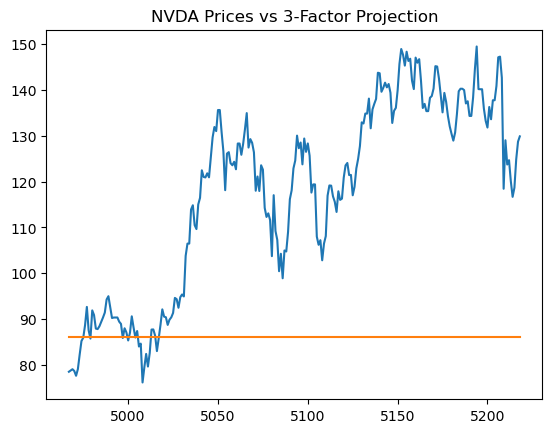

In [443]:
plt.plot(tf_df['NVDA Prices'])
plt.plot((1 + tf_df['NVDA 3F']) * tf_df['NVDA Prices'].iloc[0])
plt.title('NVDA Prices vs 3-Factor Projection')

Text(0.5, 1.0, 'JPM Prices vs 3-Factor Projection')

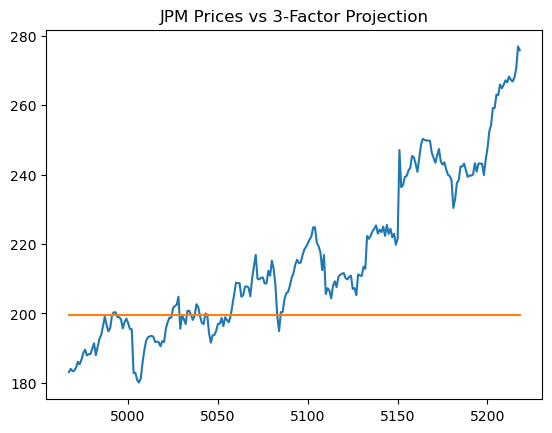

In [444]:
plt.plot(tf_df['JPM Prices'])
plt.plot((1 + tf_df['JPM 3F']) * tf_df['JPM Prices'].iloc[0])
plt.title('JPM Prices vs 3-Factor Projection')

Text(0.5, 1.0, 'GS Prices vs 3-Factor Projection')

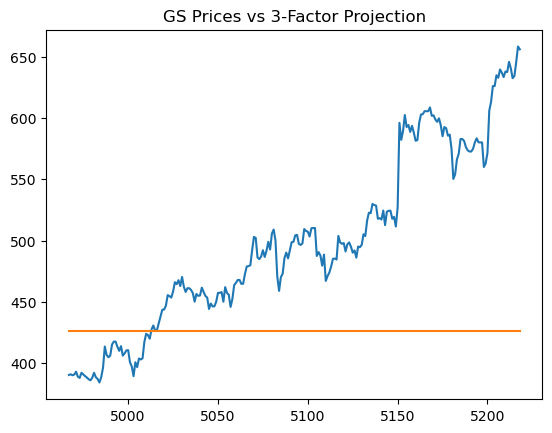

In [450]:
plt.plot(tf_df['GS Prices'])
plt.plot((1 + tf_df['GS 3F']) * tf_df['GS Prices'].iloc[0])
plt.title('GS Prices vs 3-Factor Projection')

Text(0.5, 1.0, 'AAPL Prices vs CAPM')

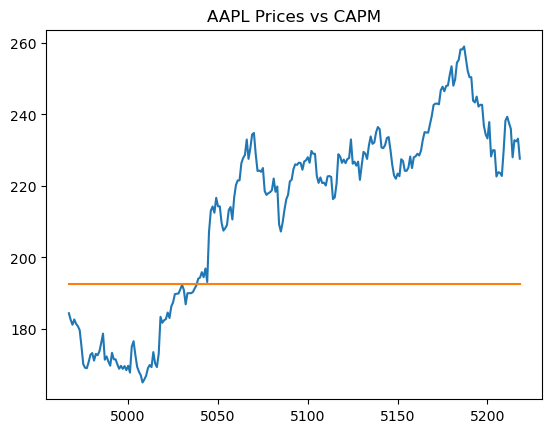

In [446]:
#CAPM

plt.plot(tf_df['AAPL Prices'])
plt.plot((1 + tf_df['AAPL CAPM']) * tf_df['AAPL Prices'].iloc[0])
plt.title('AAPL Prices vs CAPM')

Text(0.5, 1.0, 'NVDA Prices vs CAPM')

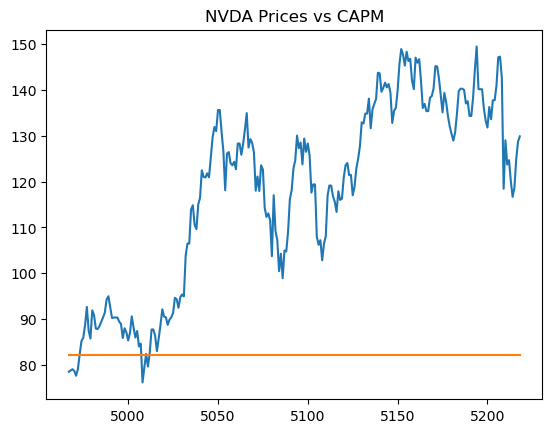

In [447]:
plt.plot(tf_df['NVDA Prices'])
plt.plot((1 + tf_df['NVDA CAPM']) * tf_df['NVDA Prices'].iloc[0])
plt.title('NVDA Prices vs CAPM')

Text(0.5, 1.0, 'JPM Prices vs CAPM')

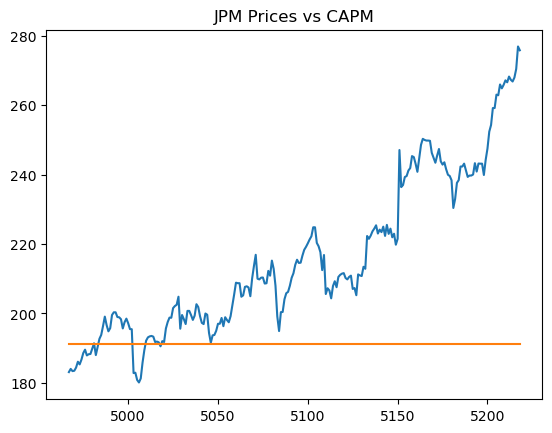

In [448]:
plt.plot(tf_df['JPM Prices'])
plt.plot((1 + tf_df['JPM CAPM']) * tf_df['JPM Prices'].iloc[0])
plt.title('JPM Prices vs CAPM')

Text(0.5, 1.0, 'GS Prices vs CAPM')

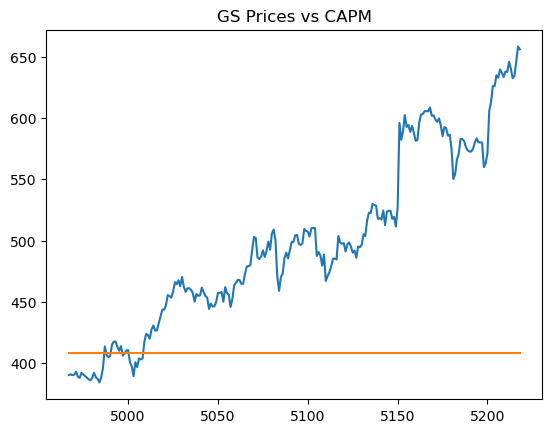

In [449]:
plt.plot(tf_df['GS Prices'])
plt.plot((1 + tf_df['GS CAPM']) * tf_df['GS Prices'].iloc[0])
plt.title('GS Prices vs CAPM')

In [1]:
#aapl sharpe ratio, cumulative returns, volatility

#cumulative returns
aapl_cum_returns = (aapl.iloc[-1] / aapl.iloc[0]) - 1
nvda_cum_returns = (nvda.iloc[-1] / nvda.iloc[0]) - 1
jpm_cum_returns = (jpm.iloc[-1] / jpm.iloc[0]) - 1
gs_cum_returns = (gs.iloc[-1] / gs.iloc[0]) - 1

#sharpe ratio
aapl_sharpe = ((aapl_df['AAPL Prices'].mean() - risk_free_rate) / aapl_df['AAPL Prices'].std()) * np.sqrt(len(aapl))
nvda_sharpe = ((nvda_df['NVDA Prices'].mean() - risk_free_rate) / nvda_df['NVDA Prices'].std()) * np.sqrt(len(nvda))
jpm_sharpe = ((jpm_df['JPM Prices'].mean() - risk_free_rate) / jpm_df['JPM Prices'].std()) * np.sqrt(len(jpm))
gs_sharpe = ((gs_df['GS Prices'].mean() - risk_free_rate) / gs_df['GS Prices'].std()) * np.sqrt(len(gs))

#volatility
aapl_sigma = aapl.std()
nvda_sigma = nvda.std()
jpm_sigma = jpm.std()
gs_sigma = gs.std()

NameError: name 'aapl' is not defined

In the following cell, write any comments about your code and reasoning, such as what the takeaways are from the backtesting, what you noticed about the results, what they tell you, what you would do differently next time, etc.

In [ ]:
"""
Both, the CAPM and my own three-factor model incorrectly predicted the return, by underestimating the annual
growth of the stock. However, the three-factor model was more accurate to the actual return. I believe the
three factor model can be more effective next time, if I take more macroeconomic factors into account.

"""

# Part 4: Comparison

In the following cell, compare the CAPM model with your multi-factor model. What performed better? Why do you think that is?

In [ ]:
"""
My three factor model was more accurate at predicting the annual forecasted price,
however both models were off by a large margin. I believe the three-factor model
was able to perform better because it took into account things like the PE ratio and 
book value which can all be important in a multi-factor model.
"""

# References, Reflection, and Submission

In the following cell, list any references and resources you used to help you with this coding challenge (including ChatGPT), and what you got out of each resource. There's nothing wrong with getting help, but it's important to cite when you do!

In [ ]:
"""
I used ChatGPT to confirm some of my processes. I wanted to check if I can annualize my data
my multiplying some of the beta values by 252 to annualize it. Other than that, I watched YouTube
videos and browsed the web to learn about multi-factor models to get a better understanding of how
they work.

"""

In the following cell, write a brief reflection on what you learned from this challenge. What did you do well? What do you wish you had done differently? Is there anything else you would like to add about your code or process that would help us understand?

In [ ]:
"""
I learned a lot about how quant models get built, and the thought process that goes behind it.
I wish I had a better understanding of what factors have a greater impact on stock prices, as
well as the factors that are related to one another. I think I did a good job executing my
strategies, and processing the data in a way that worked best with my strategy. I think I need
more experience to improve my models in the future.
"""

Submit this template file in the format "first_last_mfm.ipynb".

Example: "jason_bhalla_mfm.ipynb"